In [1]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from tabulate import tabulate

In [3]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1, 1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order=df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(100*height/total),
               ha="center")
    plt.show()

In [4]:
def determine_data_types(df):
    res = {}
    for col in df.columns:
        try:
            temp = [float(x) for x in df[col]]
            res[col] = 'Numerical'
        except:
            res[col] = 'Categorical'
    return res

In [5]:
def check_missing_values(df, name):
    print("Dataset: " + name)
    for col in df.columns:
        # count number of rows with missing values
        n_miss = df[[col]].isnull().sum()
        perc = n_miss / df.shape[0] * 100
        print('> '+ col +', Missing: %d (%.1f%%)' % (n_miss, perc))

## Attribute Information
Player 1 Name of Player 1

Player 2 Name of Player 2

Result Result of the match (0/1) - Referenced on Player 1 is Result = 1 if Player 1 wins 
(FNL.1>FNL.2)

FSP.1 First Serve Percentage for player 1 (Real Number)

FSW.1 First Serve Won by player 1 (Real Number)

SSP.1 Second Serve Percentage for player 1 (Real Number)

SSW.1 Second Serve Won by player 1 (Real Number)

ACE.1 Aces won by player 1 (Numeric-Integer)

DBF.1 Double Faults committed by player 1 (Numeric-Integer)

WNR.1 Winners earned by player 1 (Numeric)

UFE.1 Unforced Errors committed by player 1 (Numeric)

BPC.1 Break Points Created by player 1 (Numeric)

BPW.1 Break Points Won by player 1 (Numeric)

NPA.1 Net Points Attempted by player 1 (Numeric)

NPW.1 Net Points Won by player 1 (Numeric)

TPW.1 Total Points Won by player 1 (Numeric)

ST1.1 Set 1 result for Player 1 (Numeric-Integer)

ST2.1 Set 2 Result for Player 1 (Numeric-Integer)

ST3.1 Set 3 Result for Player 1 (Numeric-Integer)

ST4.1 Set 4 Result for Player 1 (Numeric-Integer)

ST5.1 Set 5 Result for Player 1 (Numeric-Integer)

FNL.1 Final Number of Games Won by Player 1 (Numeric-Integer)

FSP.2 First Serve Percentage for player 2 (Real Number)

FSW.2 First Serve Won by player 2 (Real Number)

SSP.2 Second Serve Percentage for player 2 (Real Number)

SSW.2 Second Serve Won by player 2 (Real Number)

ACE.2 Aces won by player 2 (Numeric-Integer)

DBF.2 Double Faults committed by player 2 (Numeric-Integer)

WNR.2 Winners earned by player 2 (Numeric)

UFE.2 Unforced Errors committed by player 2 (Numeric)

BPC.2 Break Points Created by player 2 (Numeric)

BPW.2 Break Points Won by player 2 (Numeric)

NPA.2 Net Points Attempted by player 2 (Numeric)

NPW.2 Net Points Won by player 2 (Numeric)

TPW.2 Total Points Won by player 2 (Numeric)

ST1.2 Set 1 result for Player 2 (Numeric-Integer)

ST2.2 Set 2 Result for Player 2 (Numeric-Integer)

ST3.2 Set 3 Result for Player 2 (Numeric-Integer)

ST4.2 Set 4 Result for Player 2 (Numeric-Integer)

ST5.2 Set 5 Result for Player 2 (Numeric-Integer)

FNL.2 Final Number of Games Won by Player 2 (Numeric-Integer)

Round Round of the tournament at which game is played (Numeric-Integer)

## Women's Tennis
Load in and combine all the wormen's tournament data.

In [6]:
w_aus_open = pd.read_csv('./datasets/AusOpen-women-2013.csv')
w_french_open = pd.read_csv('./datasets/FrenchOpen-women-2013.csv')
w_wimby = pd.read_csv('./datasets/Wimbledon-women-2013.csv')
w_us_open = pd.read_csv('./datasets/USOpen-women-2013.csv')

In [7]:
w_aus_open

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Serena Williams,Ashleigh Barty,1,1,2.0,0.0,59,20,41,8,...,0.0,0.0,2.0,4.0,31,2.0,1.0,NaN,NaN,NaN
1,Vesna Dolonc,Lara Arruabarrena,1,1,2.0,1.0,65,33,35,10,...,4.0,7.0,NaN,NaN,74,6.0,2.0,4.0,NaN,NaN
2,Pauline Parmentier,Karolina Pliskova,1,0,0.0,2.0,63,16,37,4,...,5.0,14.0,NaN,NaN,64,6.0,6.0,NaN,NaN,NaN
3,Heather Watson,Daniela Hantuchova,1,0,1.0,2.0,61,41,39,19,...,5.0,13.0,5.0,8.0,102,7.0,3.0,6.0,NaN,NaN
4,Samantha Stosur,Klara Zakopalova,1,1,2.0,0.0,65,28,35,11,...,4.0,14.0,10.0,15.0,60,3.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Simona Halep,Dominika Cibulkova,5,0,0.0,2.0,67,13,33,6,...,5.0,9.0,3.0,4.0,54,6.0,6.0,NaN,NaN,NaN
123,Agnieszka Radwanska,Victoria Azarenka,5,1,2.0,1.0,59,33,41,16,...,2.0,5.0,20.0,34.0,74,1.0,7.0,0.0,NaN,NaN
124,Eugenie Bouchard,Na Li,6,0,0.0,2.0,45,13,55,5,...,6.0,10.0,11.0,14.0,71,6.0,6.0,NaN,NaN,NaN
125,Dominika Cibulkova,Agnieszka Radwanska,6,1,2.0,0.0,64,22,36,10,...,1.0,9.0,4.0,9.0,40,1.0,2.0,NaN,NaN,NaN


In [8]:
w_french_open

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Su-Wei Hsieh,Maria Sharapova,1,0,0,2,62,18,38,5,...,4,6,3,5,57,6,6.0,NaN,NaN,NaN
1,Eugenie Bouchard,Tsvetana Pironkova,1,1,2,0,57,23,43,17,...,1,3,4,8,48,1,6.0,NaN,NaN,NaN
2,Jie Zheng,Vesna Dolonc,1,1,2,0,76,30,24,5,...,0,4,14,20,56,4,1.0,NaN,NaN,NaN
3,Tamira Paszek,Melanie Oudin,1,0,0,2,59,16,41,8,...,8,13,5,8,78,6,6.0,NaN,NaN,NaN
4,Karin Knapp,Sloane Stephens,1,0,0,2,57,18,43,13,...,5,7,1,4,61,6,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Agnieszka Radwanska,Sara Errani,5,0,0,2,70,28,30,5,...,6,7,16,24,80,6,7.0,NaN,NaN,NaN
123,Serena Williams,Svetlana Kuznetsova,5,1,2,1,66,42,34,12,...,4,9,3,6,75,1,6.0,3.0,NaN,NaN
124,Victoria Azarenka,Maria Sharapova,6,0,1,2,72,28,28,8,...,6,10,2,6,87,6,2.0,6.0,NaN,NaN
125,Serena Williams,Sara Errani,6,1,2,0,52,14,48,14,...,0,0,2,2,16,0,1.0,NaN,NaN,NaN


In [9]:
w_wimby

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.1.1,ST2.2,ST3.2,ST4.2,ST5.2
0,M.Koehler,V.Azarenka,1,0,0,2,60,21,40,8,...,16,6,8,4,NaN,6,6,NaN,NaN,NaN
1,E.Baltacha,F.Pennetta,1,0,0,2,69,23,31,6,...,6,5,14,11,NaN,6,6,NaN,NaN,NaN
2,S-W.Hsieh,T.Maria,1,1,2,0,63,17,37,10,...,1,0,8,2,NaN,1,0,NaN,NaN,NaN
3,A.Cornet,V.King,1,1,2,1,57,36,43,21,...,4,1,48,32,NaN,6,3,1.0,NaN,NaN
4,Y.Putintseva,K.Flipkens,1,0,0,2,73,34,27,12,...,9,3,35,24,NaN,7,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,A.Radwanska,N.Li,5,1,2,1,77,52,23,9,...,10,4,71,48,NaN,6,6,2.0,NaN,NaN
118,S.Lisicki,K.Kanepi,5,1,2,0,59,26,41,10,...,2,1,19,9,NaN,3,3,NaN,NaN,NaN
119,M.Bartoli,K.Flipkens,6,1,2,0,61,21,39,10,...,2,1,21,8,NaN,1,2,NaN,NaN,NaN
120,S.Lisicki,A.Radwanska,6,1,2,1,63,53,37,19,...,14,6,31,16,NaN,4,6,7.0,NaN,NaN


In [10]:
w_us_open

,Player 1,Player 2,ROUND,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST2.1.1,ST2.2,ST3.2,ST4.2,ST5.2
0,S Williams,V Azarenka,7,1,2,1,57,44,43,20,...,8,4,15.0,10.0,NaN,5,7,1.0,NaN,NaN
1,F Pennetta,V Azarenka,6,0,0,2,44,12,56,7,...,13,8,30.0,20.0,NaN,6,6,NaN,NaN,NaN
2,S Williams,N Li,6,1,2,0,63,26,37,9,...,4,1,19.0,13.0,NaN,0,3,NaN,NaN,NaN
3,R Vinci,F Pennetta,5,0,0,2,60,21,40,7,...,12,6,14.0,7.0,NaN,6,6,NaN,NaN,NaN
4,D Hantuchova,V Azarenka,5,0,0,2,58,14,42,5,...,11,7,13.0,12.0,NaN,6,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,P Ormaechea,K Date-Krumm,1,1,2,0,59,32,41,10,...,9,4,14.0,9.0,NaN,3,6,NaN,NaN,NaN
72,K Pliskova,E Bouchard,1,0,1,2,53,48,47,21,...,13,3,13.0,10.0,NaN,4,6,7.0,NaN,NaN
73,L Hradecka,A Kerber,1,0,0,2,49,17,51,4,...,8,5,6.0,5.0,NaN,6,6,NaN,NaN,NaN
74,L Davis,C Suarez Navarro,1,0,0,2,63,12,37,3,...,12,6,10.0,8.0,NaN,6,6,NaN,NaN,NaN


Women's Tennis are best of 3 sets so there will never ber results for the 4th or 5th set so I will remove them from the dataset.

I don't care what the players names are for this data. I'd like to know what stats win. That is given by the result.

Let's combine all the data, remove the 4th and 5th set columns and use a Knn imputer to fill in other missing values.

Looks like the Wimbledon and US Open data has different column names than the first two Slams. The data is captured but just under a different column name

In [11]:
w_us_open = w_us_open.rename(columns={"Player 1": "Player1", "Player 2": "Player2", "ST2.1.1": "ST1.2", "ROUND": "Round"})
w_wimby = w_wimby.rename(columns={"ST1.1.1": "ST1.2"})
w_aus_open = w_aus_open.rename(columns={"FNL1" : "FNL.1", "FNL2": "FNL.2"})

In [12]:
frames = [w_aus_open, w_french_open, w_wimby, w_us_open]
w_tennis = pd.concat(frames)

Let's learn some stuff about the data

In [13]:
determine_data_types(w_tennis)

{'Player1': 'Categorical',
 'Player2': 'Categorical',
 'Round': 'Numerical',
 'Result': 'Numerical',
 'FNL.1': 'Numerical',
 'FNL.2': 'Numerical',
 'FSP.1': 'Numerical',
 'FSW.1': 'Numerical',
 'SSP.1': 'Numerical',
 'SSW.1': 'Numerical',
 'ACE.1': 'Numerical',
 'DBF.1': 'Numerical',
 'WNR.1': 'Numerical',
 'UFE.1': 'Numerical',
 'BPC.1': 'Numerical',
 'BPW.1': 'Numerical',
 'NPA.1': 'Numerical',
 'NPW.1': 'Numerical',
 'TPW.1': 'Numerical',
 'ST1.1': 'Numerical',
 'ST2.1': 'Numerical',
 'ST3.1': 'Numerical',
 'ST4.1': 'Numerical',
 'ST5.1': 'Numerical',
 'FSP.2': 'Numerical',
 'FSW.2': 'Numerical',
 'SSP.2': 'Numerical',
 'SSW.2': 'Numerical',
 'ACE.2': 'Numerical',
 'DBF.2': 'Numerical',
 'WNR.2': 'Numerical',
 'UFE.2': 'Numerical',
 'BPC.2': 'Numerical',
 'BPW.2': 'Numerical',
 'NPA.2': 'Numerical',
 'NPW.2': 'Numerical',
 'TPW.2': 'Numerical',
 'ST1.2': 'Numerical',
 'ST2.2': 'Numerical',
 'ST3.2': 'Numerical',
 'ST4.2': 'Numerical',
 'ST5.2': 'Numerical'}

In [14]:
del w_tennis["Player1"]
del w_tennis["Player2"]

In [15]:
labels = w_tennis["Result"]

In [16]:
del w_tennis["Result"]

In [17]:
check_missing_values(w_tennis, w_tennis.columns)

Index(['Dataset: Round', 'Dataset: FNL.1', 'Dataset: FNL.2', 'Dataset: FSP.1',
       'Dataset: FSW.1', 'Dataset: SSP.1', 'Dataset: SSW.1', 'Dataset: ACE.1',
       'Dataset: DBF.1', 'Dataset: WNR.1', 'Dataset: UFE.1', 'Dataset: BPC.1',
       'Dataset: BPW.1', 'Dataset: NPA.1', 'Dataset: NPW.1', 'Dataset: TPW.1',
       'Dataset: ST1.1', 'Dataset: ST2.1', 'Dataset: ST3.1', 'Dataset: ST4.1',
       'Dataset: ST5.1', 'Dataset: FSP.2', 'Dataset: FSW.2', 'Dataset: SSP.2',
       'Dataset: SSW.2', 'Dataset: ACE.2', 'Dataset: DBF.2', 'Dataset: WNR.2',
       'Dataset: UFE.2', 'Dataset: BPC.2', 'Dataset: BPW.2', 'Dataset: NPA.2',
       'Dataset: NPW.2', 'Dataset: TPW.2', 'Dataset: ST1.2', 'Dataset: ST2.2',
       'Dataset: ST3.2', 'Dataset: ST4.2', 'Dataset: ST5.2'],
      dtype='object')
> Round, Missing: 0 (0.0%)
> FNL.1, Missing: 1 (0.2%)
> FNL.2, Missing: 1 (0.2%)
> FSP.1, Missing: 0 (0.0%)
> FSW.1, Missing: 0 (0.0%)
> SSP.1, Missing: 0 (0.0%)
> SSW.1, Missing: 0 (0.0%)
> ACE.1, Missing

In [18]:
del w_tennis["ST4.1"]
del w_tennis["ST4.2"]
del w_tennis["ST5.1"]
del w_tennis["ST5.2"]
del w_tennis["Round"]

## Use K-nn impurtor to fill in missing values in the dataset

In [19]:
from sklearn.impute import KNNImputer

In [20]:
def fill_missing_values(data, columns):
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(data)
    imputer.fit(data)
    x = imputer.transform(data)
    df = pd.DataFrame(data=x, columns=columns)
    return df

In [21]:
w_tennis = fill_missing_values(w_tennis, w_tennis.columns)

In [22]:
check_missing_values(w_tennis, w_tennis.columns)

Index(['Dataset: FNL.1', 'Dataset: FNL.2', 'Dataset: FSP.1', 'Dataset: FSW.1',
       'Dataset: SSP.1', 'Dataset: SSW.1', 'Dataset: ACE.1', 'Dataset: DBF.1',
       'Dataset: WNR.1', 'Dataset: UFE.1', 'Dataset: BPC.1', 'Dataset: BPW.1',
       'Dataset: NPA.1', 'Dataset: NPW.1', 'Dataset: TPW.1', 'Dataset: ST1.1',
       'Dataset: ST2.1', 'Dataset: ST3.1', 'Dataset: FSP.2', 'Dataset: FSW.2',
       'Dataset: SSP.2', 'Dataset: SSW.2', 'Dataset: ACE.2', 'Dataset: DBF.2',
       'Dataset: WNR.2', 'Dataset: UFE.2', 'Dataset: BPC.2', 'Dataset: BPW.2',
       'Dataset: NPA.2', 'Dataset: NPW.2', 'Dataset: TPW.2', 'Dataset: ST1.2',
       'Dataset: ST2.2', 'Dataset: ST3.2'],
      dtype='object')
> FNL.1, Missing: 0 (0.0%)
> FNL.2, Missing: 0 (0.0%)
> FSP.1, Missing: 0 (0.0%)
> FSW.1, Missing: 0 (0.0%)
> SSP.1, Missing: 0 (0.0%)
> SSW.1, Missing: 0 (0.0%)
> ACE.1, Missing: 0 (0.0%)
> DBF.1, Missing: 0 (0.0%)
> WNR.1, Missing: 0 (0.0%)
> UFE.1, Missing: 0 (0.0%)
> BPC.1, Missing: 0 (0.0%)
> BPW

## Do the EDA for Women's Tennis

## Men's Tennis Data

## Women's Models

In [23]:
import skfuzzy as fuzz
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler
X = MinMaxScaler((-1,1)).fit_transform(RobustScaler().fit_transform(Normalizer().fit_transform(w_tennis)))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, labels)

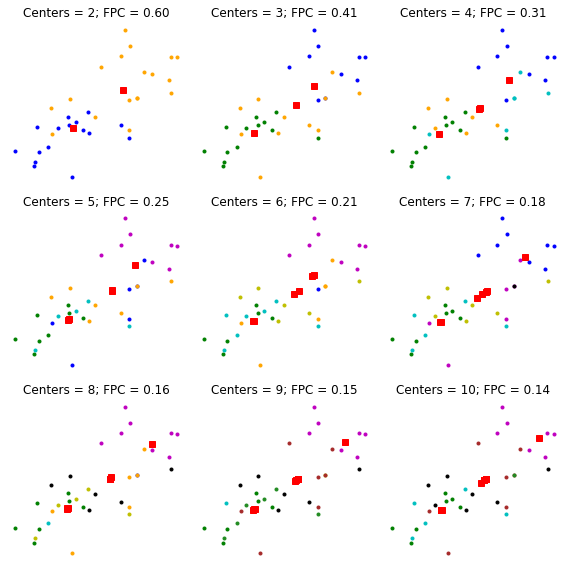

In [26]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []

colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen', 'Purple']
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_train, ncenters, 2, error=0.005, maxiter=1000, init=None, seed=[3523523])

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(X_train[0, u.argmax(axis=0) == j],
                X_train[1, u.argmax(axis=0) == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

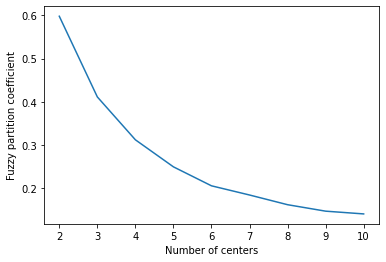

In [27]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")